In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Task 1
### Explore and describe the data

Number of anime: 12294
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


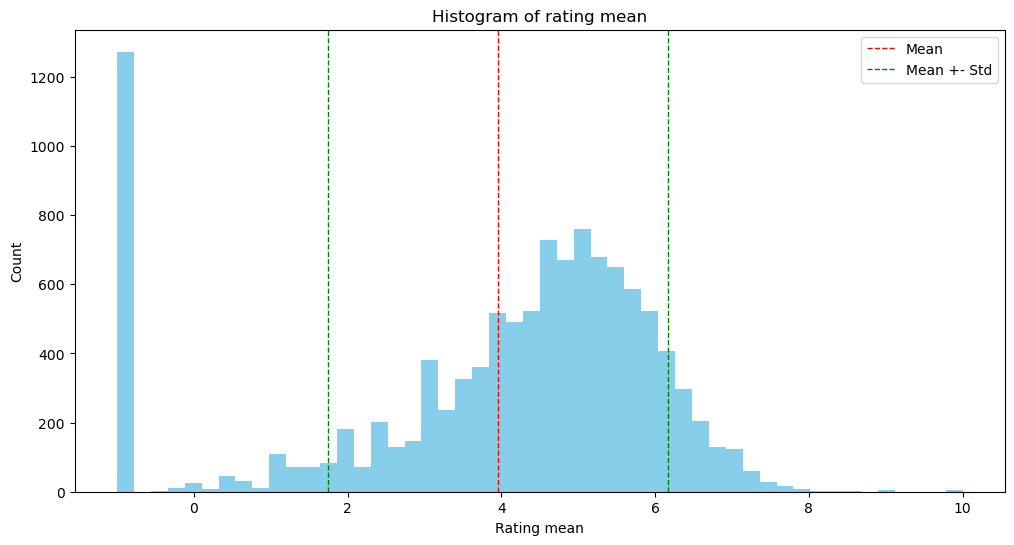

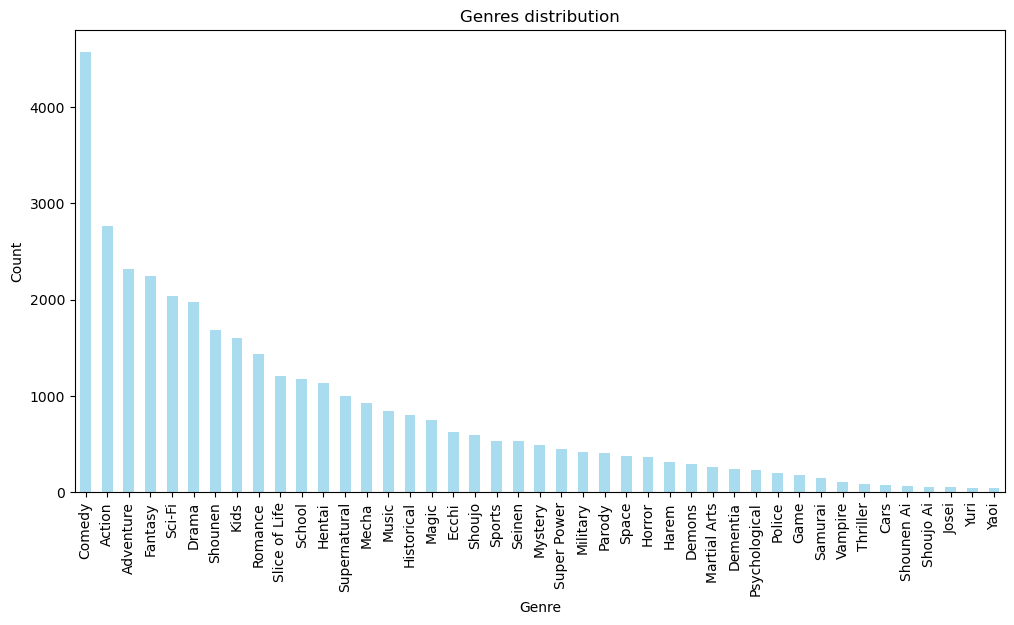

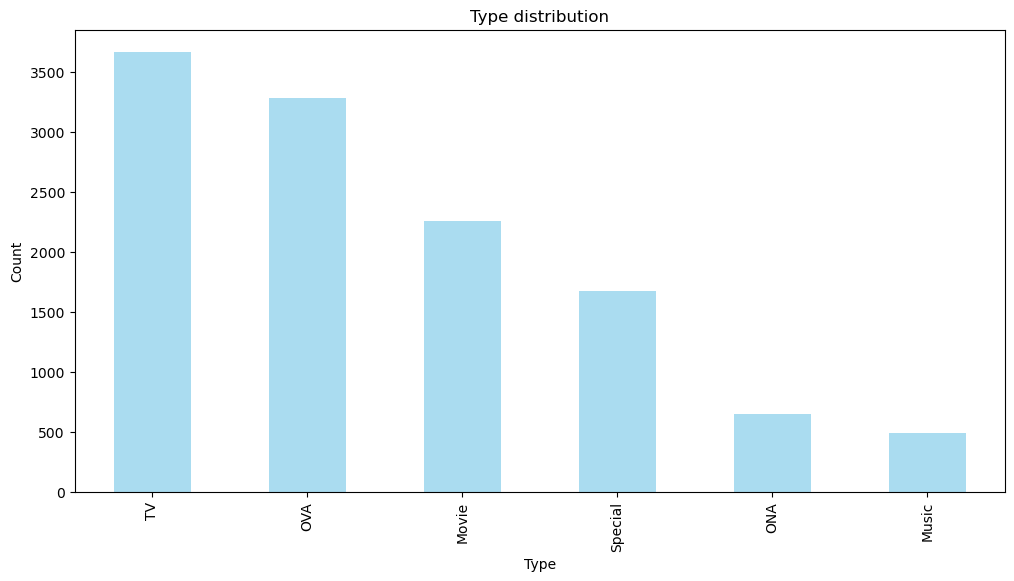

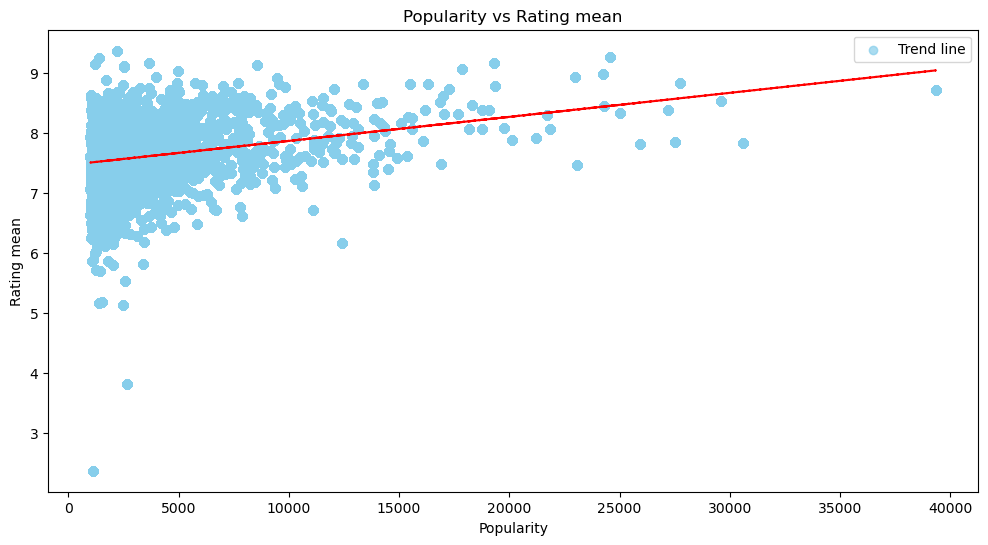

Correlation between popularity and rating mean: 0.4564300442039431


FileNotFoundError: [Errno 2] No such file or directory: '05_ComicBook/rating.csv'

In [4]:
dir_name = "05_ComicBook"
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

# print(anime.head())
# print(rating.head())

# NAMBER OF ANIME, NAN VALUES
n_anime = anime.shape[0]
print(f"Number of anime: {n_anime}")

print(anime.isna().sum())
print(rating.isna().sum())

anime = anime.dropna()
rating = rating.dropna()



# RATING MEAN AND STD

rating_mean = rating.groupby("anime_id")["rating"].mean()
rating_std = rating.groupby("anime_id")["rating"].std()


# plot histogram of rating add also a line for mean and std
plt.figure(figsize=(12, 6))
plt.hist(rating_mean,  bins=50, color='skyblue')
plt.axvline(rating_mean.mean(), color="red", linestyle="dashed", linewidth=1)
plt.axvline(rating_mean.mean() + rating_mean.std(), color="green", linestyle="dashed", linewidth=1)
plt.axvline(rating_mean.mean() - rating_mean.std(), color="green", linestyle="dashed", linewidth=1)
plt.xlabel("Rating mean")
plt.ylabel("Count")
plt.title("Histogram of rating mean")
plt.legend(["Mean", "Mean +- Std"])
plt.show()



# GENRES AND TYPE DISTRIBUTION

genres = anime["genre"].str.split(", ")
genres = genres.explode()
genres = genres.value_counts()

plt.figure(figsize=(12, 6))
genres.plot(kind="bar", color='skyblue', alpha=0.7)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genres distribution")
plt.show()

plt.figure(figsize=(12, 6))
anime["type"].value_counts().plot(kind="bar", color='skyblue', alpha=0.7)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Type distribution")
plt.show()





# POPULARITY VS RATING MEAN

anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")
rating = rating.merge(anime, on="anime_id")

rating_popularity = rating.groupby("anime_id")["rating_x"].count().reset_index(name="popularity")
rating = rating.merge(rating_popularity, on="anime_id")
rating = rating[rating["popularity"] > 1000]

plt.figure(figsize=(12, 6))
plt.scatter(rating["popularity"], rating["rating_y"], color='skyblue', alpha=0.7)  # Usa 'rating_y' per il rating medio
z = np.polyfit(rating["popularity"], rating["rating_y"], 1)
p = np.poly1d(z)
plt.plot(rating["popularity"], p(rating["popularity"]), "r--")
plt.xlabel("Popularity")
plt.ylabel("Rating mean")
plt.title("Popularity vs Rating mean")
plt.legend(["Trend line"])
plt.show()

corr = rating["popularity"].corr(rating["rating_y"])
print(f"Correlation between popularity and rating mean: {corr}")




# USER RATING MEAN DISTRIBUTION AND STD

rating = pd.read_csv(f"{dir_name}/rating.csv")
rating_mean = rating.groupby("user_id")["rating"].mean()

plt.figure(figsize=(12, 6))
plt.hist(rating_mean,  bins=50, color='skyblue')
plt.axvline(rating_mean.mean(), color="red", linestyle="dashed", linewidth=1)
plt.axvline(rating_mean.mean() + rating_mean.std(), color="green", linestyle="dashed", linewidth=1)
plt.axvline(rating_mean.mean() - rating_mean.std(), color="green", linestyle="dashed", linewidth=1)
plt.xlabel("Rating mean")
plt.ylabel("Count")
plt.title("Histogram of rating mean")
plt.legend(["Mean", "Mean +- Std"])
plt.show()




# Task 2
### Pre-process the data 

In [ ]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")


# STEP 1: fill missing rating using user rating
# if we have this reting we can use

rating = rating.dropna(subset=['rating'])
anime_with_nan_rating = anime[anime['rating'].isna()]
rating_for_nan_anime = rating[rating['anime_id'].isin(anime_with_nan_rating['anime_id'])]
user_rating_counts = rating_for_nan_anime.groupby('anime_id')['user_id'].count().reset_index(name='user_rating_count')
anime_with_user_ratings = user_rating_counts[user_rating_counts['user_rating_count'] > 0]
# get the mean rating of the user that rated the anime, and fill onlythe missing rating
user_avg_ratings = rating.groupby('anime_id')['rating'].mean().reset_index(name='user_rating_mean')
anime = anime.merge(user_avg_ratings, on='anime_id', how='left')
anime['rating'] = anime['rating'].combine_first(anime['user_rating_mean'])
anime.drop('user_rating_mean', axis=1, inplace=True)

# STEP 2: remove missing rating 
# remaining missing rating are on anime that have no rating from any user
# so we can remove them because don't have any information for us
anime = anime.dropna(subset=['rating'])


# STEP 3: remove all other missing values
anime = anime.dropna()







<h2>Phase 2: Data Processing

The second step in the functioning of a recommendation engine is data processing, a critical phase in which the collected data is refined and prepared for analysis.

This step is all about ensuring the quality and usability of the data.

First, data cleansing is performed to remove irrelevant, incomplete, or erroneous information. This may involve filtering out noise or correcting data inconsistencies to ensure that the remaining data is accurate and reliable.

Next, data transformation is performed to convert the raw data into a structured format suitable for analysis. This can include normalizing data (scaling it to a certain range), categorizing unstructured data (such as text or images), and creating user or object profiles.

Another key aspect is data integration, where data from different sources is combined to create a comprehensive view. For example, users’ demographic data can be merged with their behavioral data. Finally, feature extraction is critical, where specific attributes or “features” are identified and extracted from the data.

These features, such as the frequency of item views or the types of products viewed, are what the recommendation algorithms will later use to make predictions.

Overall, data processing transforms raw, unorganized data into a clean, structured format that is essential for the recommendation engine to function effectively.

<h2>Phase 3: Filtering
At this stage, methods such as matrix factorization are used.

Matrix factorization is a mathematical technique for predicting user preferences. It works by breaking down a large user-item interaction matrix into smaller, more manageable matrices representing users and items. These matrices are then used to identify latent factors that influence user preferences.

By applying specific mathematical recommendation algorithms, the system can predict how likely a user is to prefer an item, even if they haven’t interacted with it before.

<h2>Phase 4: Generating Recommendations
The fourth step in the operation of a recommendation engine is the generation of recommendations, a crucial phase in which the processed data and the insights gained from the previous steps are used to suggest relevant items or content to the user.

In this stage, the engine applies algorithms to predict and match user preferences with available items to provide personalized and relevant suggestions. The engine considers factors such as past user behavior, similarities between items, and user profiles to generate these recommendations.

In making these recommendations, the engine strives to balance relevance, user engagement, and business goals, such as promoting new products or increasing sales in certain categories.

The ultimate goal is to enhance the user experience by providing timely and relevant suggestions that are tailored to the user’s needs and interests.

What are these types? Let’s look at what many e-commerce sites are doing with their recommendations:

Personalized Recommendations: Tailored specifically to an individual’s preferences and past behavior, these suggestions are based on items the user has previously interacted with, showing similar or complementary products.
Best Sellers: These are popular items across the platform, often recommended to new users or those with limited interaction history. They represent what is trending or most purchased in a certain category.
Related Items: Often seen as “Customers who viewed this also viewed” suggestions, these are based on the correlation between products, recommending items that other users have looked at or purchased in relation to the current item.
New Arrivals: Recommendations focusing on the newest items in a category, useful for returning users to discover the latest products or content.
